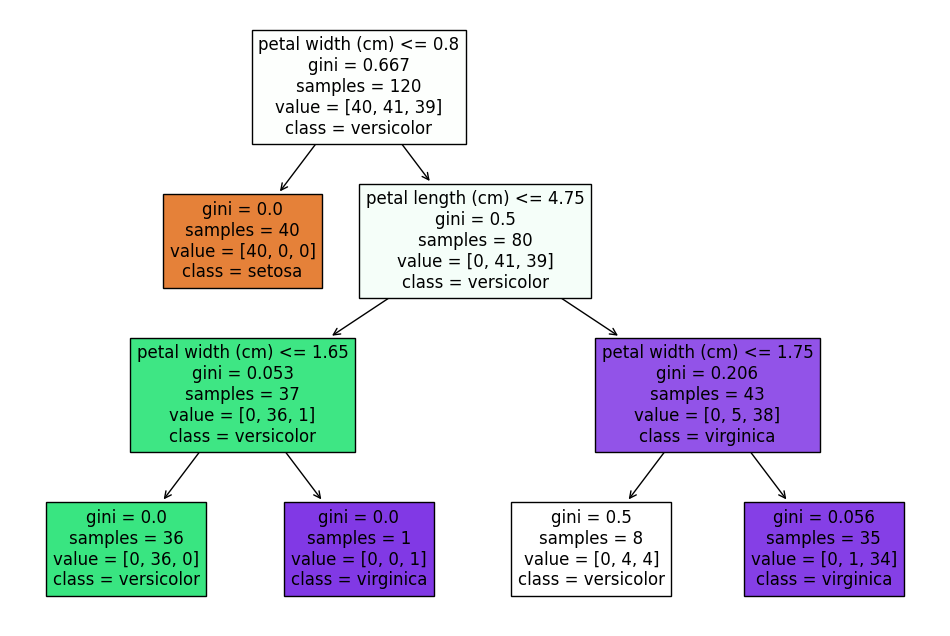

In [1]:
#question 31

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (example with Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(dt_classifier, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


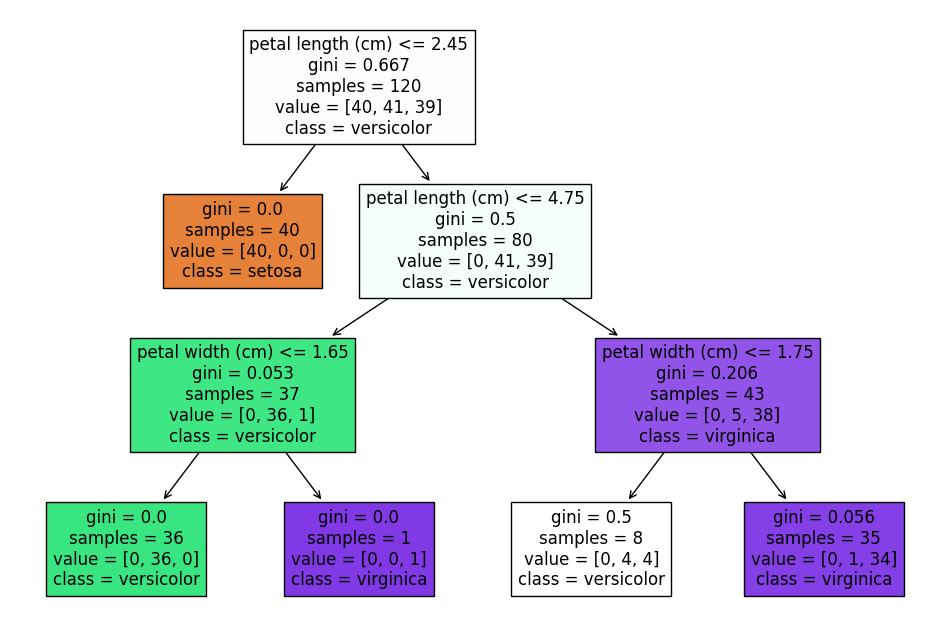

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
#question 32

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (example with Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(dt_classifier, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


In [3]:
#question 33

import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples
num_samples = 1000

# Generate features
age = np.random.randint(18, 80, size=num_samples)
income = np.random.randint(20000, 200000, size=num_samples)
balance = np.random.randint(-5000, 50000, size=num_samples)
education = np.random.randint(1, 5, size=num_samples)  # Assuming education levels: 1=high school, 2=bachelor, 3=master, 4=doctorate
payment_delay = np.random.randint(-2, 8, size=num_samples)  # Payment delay months
bill_amt = np.random.randint(0, 50000, size=num_samples)  # Amount of bill statement
pay_amt = np.random.randint(0, 50000, size=num_samples)  # Amount of previous payment

# Generate target variable
default = np.random.choice(['yes', 'no'], size=num_samples, p=[0.2, 0.8])

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Balance': balance,
    'Education': education,
    'Payment_Delay': payment_delay,
    'Bill_Amount': bill_amt,
    'Pay_Amount': pay_amt,
    'Default': default
})

# Display the first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv('credit_card_default.csv', index=False)




   Age  Income  Balance  Education  Payment_Delay  Bill_Amount  Pay_Amount  \
0   62  132882    10168          4             -2        40603       10148   
1   65   57734    35717          2              4        26489       46564   
2   71  163990    -1122          2              7        10417       27709   
3   18   58372     -644          2              4        28542        8661   
4   21   42893     9851          2              0        37636       33691   

  Default  
0      no  
1      no  
2      no  
3      no  
4      no  


In [4]:
#question 34

def gini_impurity(labels):
    """
    Calculate the Gini impurity for a list of class labels.

    Parameters:
    labels (list): A list of class labels.

    Returns:
    float: Gini impurity value.
    """
    # Count the occurrences of each class label
    class_counts = {}
    for label in labels:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    # Calculate the Gini impurity
    total_samples = len(labels)
    gini = 1.0
    for label in class_counts:
        probability = class_counts[label] / total_samples
        gini -= probability ** 2

    return gini

# Example usage:
if __name__ == "__main__":
    labels = ['yes', 'no', 'yes', 'yes', 'no', 'no']
    gini = gini_impurity(labels)
    print("Gini Impurity:", gini)




Gini Impurity: 0.5


In [5]:
#question 35

import numpy as np

def gini_impurity(labels):
    """
    Calculate the Gini impurity for a list of class labels.

    Parameters:
    labels (list): A list of class labels.

    Returns:
    float: Gini impurity value.
    """
    # Count the occurrences of each class label
    class_counts = {}
    for label in labels:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    # Calculate the Gini impurity
    total_samples = len(labels)
    gini = 1.0
    for label in class_counts:
        probability = class_counts[label] / total_samples
        gini -= probability ** 2

    return gini

def attribute_gini_impurity(X, y, attribute_index):
    """
    Calculate the Gini impurity for a specific attribute of a dataset.

    Parameters:
    X (numpy.ndarray): Features of the dataset.
    y (numpy.ndarray): Target labels of the dataset.
    attribute_index (int): Index of the attribute for which Gini impurity is to be calculated.

    Returns:
    float: Gini impurity value for the attribute.
    """
    attribute_values = np.unique(X[:, attribute_index])
    total_samples = len(y)
    gini_attribute = 0.0
    for value in attribute_values:
        indices = np.where(X[:, attribute_index] == value)[0]
        labels_subset = y[indices]
        weight = len(indices) / total_samples
        gini_subset = gini_impurity(labels_subset)
        gini_attribute += weight * gini_subset
    return gini_attribute

# Example usage:
if __name__ == "__main__":
    # Example dataset
    X = np.array([[1, 'A'], [1, 'B'], [2, 'A'], [3, 'B'], [3, 'B']])
    y = np.array(['yes', 'no', 'no', 'yes', 'yes'])

    # Calculate Gini impurity for each attribute
    for i in range(X.shape[1]):
        gini = attribute_gini_impurity(X, y, i)
        print(f"Gini impurity for attribute {i}: {gini:.4f}")


Gini impurity for attribute 0: 0.2000
Gini impurity for attribute 1: 0.4667
